# Wine Clustering Analysis Using Machine Learning



## Introduction

Wine classification is an essential aspect of the wine industry, helping producers and consumers distinguish between different varieties based on chemical composition. In this notebook, we explore the famous Wine dataset, which contains the results of a chemical analysis of wines grown in a specific region of Italy. Each wine sample is characterized by 13 chemical attributes, such as alcohol content, flavonoids, and phenols, which influence its quality, taste, and classification.

## Objective
The primary goal of this notebook is to cluster different types of wines based on their chemical properties using unsupervised learning techniques. By applying clustering algorithms, we aim to identify natural groupings within the data and analyze whether these clusters align with the known wine classes.

## Dataset Overview
The Wine dataset consists of:
- 178 wine samples
- 13 numerical features representing different chemical properties
- 3 wine classes, which represent different grape varieties

The dataset is widely used in machine learning for classification and clustering tasks due to its well-structured numerical attributes.

## Approach
We will follow these key steps:

1. Data Preprocessing – Standardizing the dataset to ensure all features are on the same scale.
2. Exploratory Data Analysis (EDA) – Visualizing feature distributions and relationships.
3. Dimensionality Reduction – Using Principal Component Analysis (PCA) to visualize the dataset in two or three dimensions.
4. Clustering Methods – Applying clustering algorithms such as:
  - K-Means Clustering
  - Hierarchical Clustering
  - DBSCAN
5. Evaluation – Comparing clustering results with actual wine classes to assess performance.
Expected Outcome
By the end of this analysis, we aim to uncover meaningful wine clusters that align with the known categories. This unsupervised approach can be useful for automated wine classification, quality control, and market segmentation in the wine industry.

[source](https://archive.ics.uci.edu/dataset/109/wine)

# Load data

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

df = pd.concat([X, y], axis=1)
df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malicacid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [5]:
# Check missing and null values
if df.isna().sum().any() or df.isnull().sum().any():
  print("Missing or null values found")
else:
  print("No missing or null values found")

No missing or null values found


In [6]:
unique_values = df.apply(lambda x: x.nunique())
print(unique_values)

Alcohol                         126
Malicacid                       133
Ash                              79
Alcalinity_of_ash                63
Magnesium                        53
Total_phenols                    97
Flavanoids                      132
Nonflavanoid_phenols             39
Proanthocyanins                 101
Color_intensity                 132
Hue                              78
0D280_0D315_of_diluted_wines    122
Proline                         121
class                             3
dtype: int64


## Univariate analysis

### Features distribution

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def univariate_analysis(df, plot_type='hist', scaled=False):
    """
    Perform univariate analysis using histograms or box plots.
    """
    if plot_type not in ['hist', 'box']:
        raise ValueError("plot_type must be either 'hist' or 'box'.")

    plt.figure(figsize=(12, 8))

    if plot_type == 'hist':
        plt.suptitle('Univariate Analysis - Features Distribution', fontsize=16)

        cols = 3  # Number of columns for subplots
        rows = int(np.ceil(df.shape[1] / cols))  # Compute required rows dynamically

        for i, col in enumerate(df.columns, 1):
            plt.subplot(rows, cols, i)
            sns.histplot(df[col], kde=True, bins=30)
            plt.title(col)

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    elif plot_type == 'box':
        if scaled:
            scaler = MinMaxScaler()
            df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
            plt.suptitle('Box Plot for Scaled Feature Distributions', fontsize=16)
            sns.boxplot(data=df_scaled)
        else:
            plt.suptitle('Box Plot for Feature Distributions', fontsize=16)
            sns.boxplot(data=df)

        plt.xticks(rotation=90)
        plt.show()


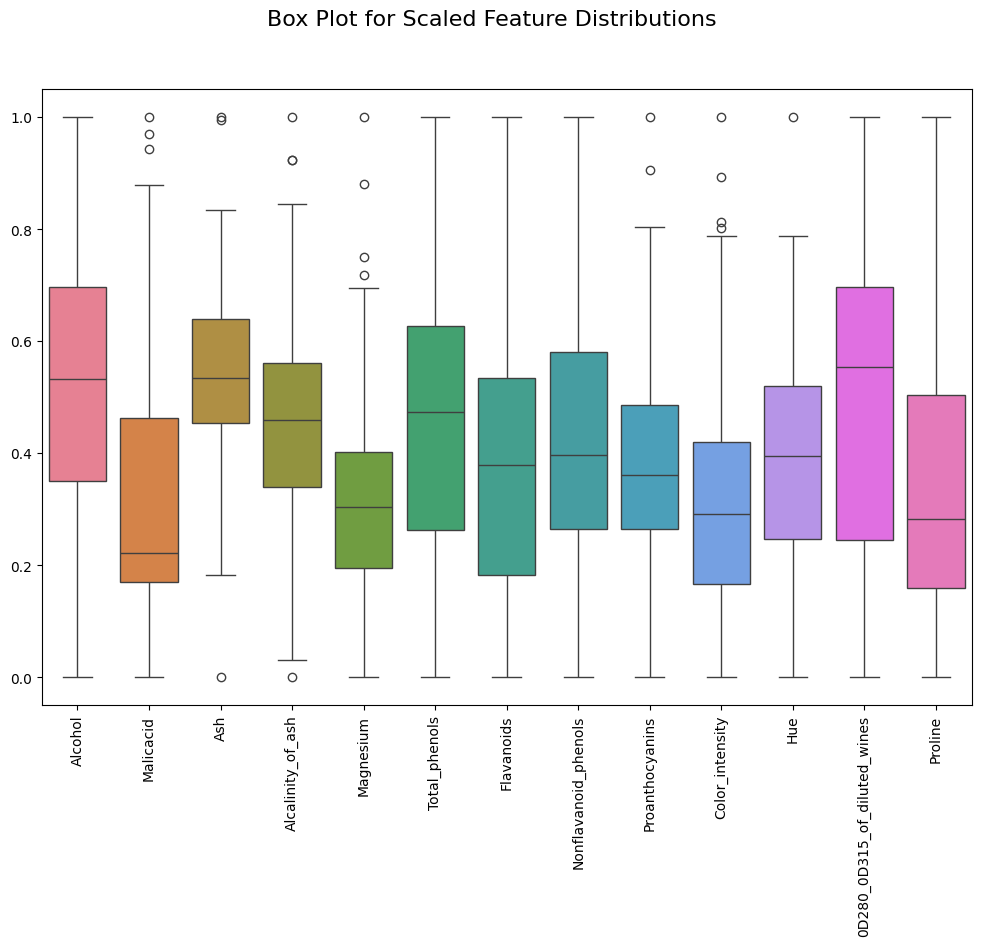

In [8]:
univariate_analysis(X, plot_type='box', scaled=True)

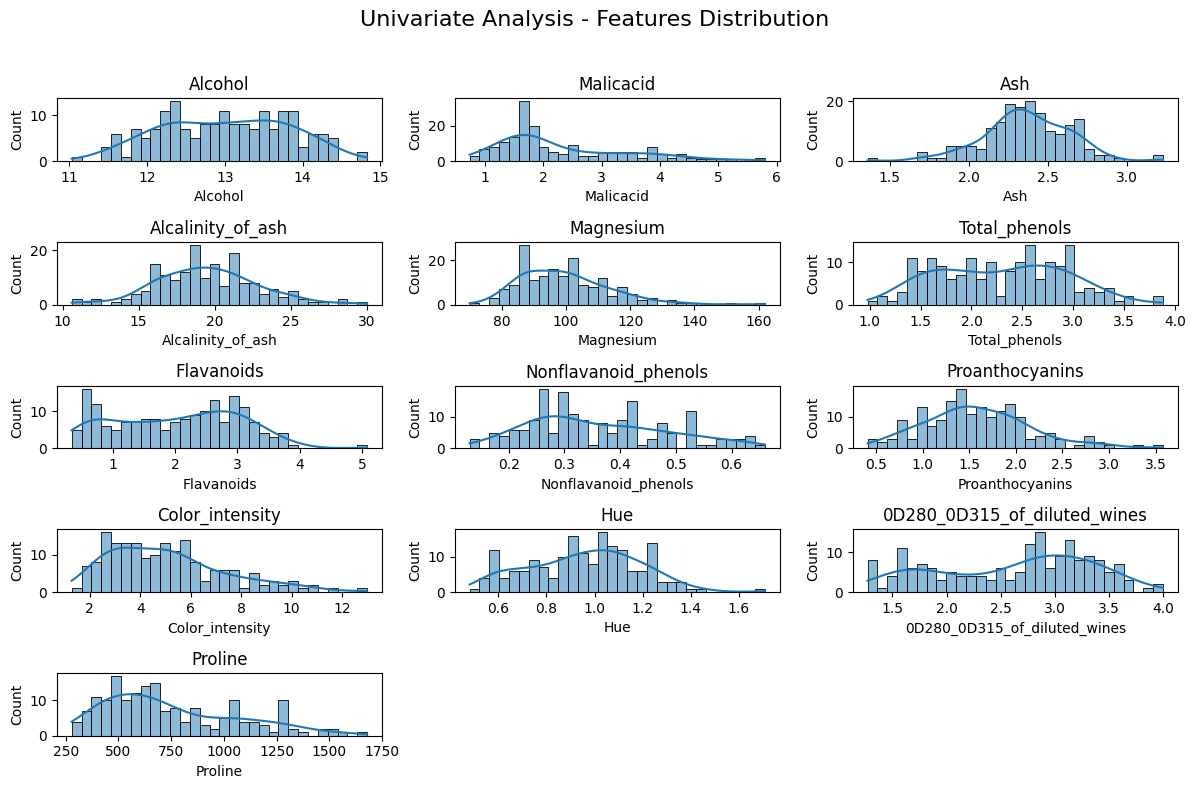

In [9]:
univariate_analysis(X, plot_type='hist')

## Multivariate analysis

### Pairplot

In [10]:
sns.pairplot(df, hue='class')
plt.suptitle('Pairplot of Features', fontsize=16)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Features Correlation

#### Features function library

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

def filter_correlated_features(df, threshold=0.7):
    '''
      Filter features with correlation above threshold.
      Helper function of features_correlations.
    '''
    # Compute absolute correlation matrix
    feat_corr = df.corr().abs()

    # Set the diagonal to NaN to ignore self-correlations
    np.fill_diagonal(feat_corr.values, np.nan)

    # Apply threshold filtering for heatmap
    filtered_corr = feat_corr[feat_corr >= threshold]

    # Identify pairs with high correlations
    corr_pairs_df = filtered_corr.unstack().reset_index()
    corr_pairs_df.columns = ['feature_1', 'feature_2', 'correlation']
    corr_pairs_df = corr_pairs_df.sort_values(by='correlation', ascending=False).dropna()
    corr_pairs_df = corr_pairs_df[corr_pairs_df['correlation'].duplicated()]

    # Features to drop
    unique_values, counts = np.unique(corr_pairs_df[['feature_1','feature_2']], return_counts=True)
    features_drop = unique_values[counts > 1].tolist()

    return filtered_corr, corr_pairs_df, features_drop


def heatmap_correlations(df, threshold=None):
    '''
      Display heatmap of feature correlations.
      Helper function of features_correlations.
    '''
    plt.figure()
    mask = np.triu(np.ones_like(df, dtype=bool)) | df.isnull() # Create a mask for the upper triangle to be blank
    sns.heatmap(df, annot=True, cmap='coolwarm', mask=mask, fmt=".2f")
    plt.title(f"Feature Correlation Heatmap (Threshold ≥ {threshold})" if threshold else "Feature Correlation Heatmap")
    plt.show()


def features_hierarchical_clustering(df, threshold, heatmap_clustering=False):
    """
    Grouping similar features using hierarchical clustering.
    """
    plt.figure(figsize=(12, 5))

    # Compute dissimilarity matrix (1 - absolute correlation)
    correlation_matrix = df.corr().abs()
    dissimilarity = 1 - correlation_matrix

    # Convert to condensed form
    dissimilarity_condensed = squareform(dissimilarity, checks=False)

    # Perform Hierarchical Clustering
    Z = linkage(dissimilarity_condensed, method='complete')

    # Plot dendrogram
    if not heatmap_clustering:
        dendrogram(Z, labels=df.columns, orientation='top', leaf_rotation=90)
        plt.title("Hierarchical Clustering of Features")
        plt.show()
        return  # Exit if heatmap is not requested

    # Assign cluster labels
    labels = fcluster(Z, threshold, criterion='distance')

    # Order columns by cluster labels
    sorted_indices = np.argsort(labels)
    clustered_df = df.iloc[:, sorted_indices]

    # Compute reordered correlation matrix
    reordered_correlations = clustered_df.corr()

    # Create mask for the upper triangle
    mask = np.triu(np.ones_like(reordered_correlations, dtype=bool))

    # Plot clustered heatmap
    sns.clustermap(reordered_correlations.abs(), method="complete", cmap='RdBu',
                   annot=True, #annot_kws={"size": 7},
                  #  vmin=-1, vmax=1,
                   figsize=(15, 12),
                  #  mask=mask,
                   )
    plt.show()


def features_correlations(df, threshold, heatmap=False, clustering=False, heatmap_clustering=False, output=False):
    """
    Computes and visualizes feature correlations.
    Identify features to drop
    """

    # Heatmap for full Correlation WITHOUT threshold
    if threshold is None and heatmap:
        # Compute absolute correlation matrix
        feat_corr = df.corr().abs()
        # Set the diagonal to NaN to ignore self-correlations
        np.fill_diagonal(feat_corr.values, np.nan)
        heatmap_correlations(feat_corr)

    # Filter features with high correlation above threshold
    if threshold is not None:
        filtered_corr, corr_pairs_df, features_drop = filter_correlated_features(df, threshold)

    if threshold is not None and heatmap:
        heatmap_correlations(filtered_corr, threshold)

    if threshold is not None and clustering:
        features_hierarchical_clustering(df, threshold)

    if threshold is not None and heatmap_clustering:
        features_hierarchical_clustering(df, threshold, heatmap_clustering=True)

    if output:
        return corr_pairs_df, features_drop


#### Heatmap

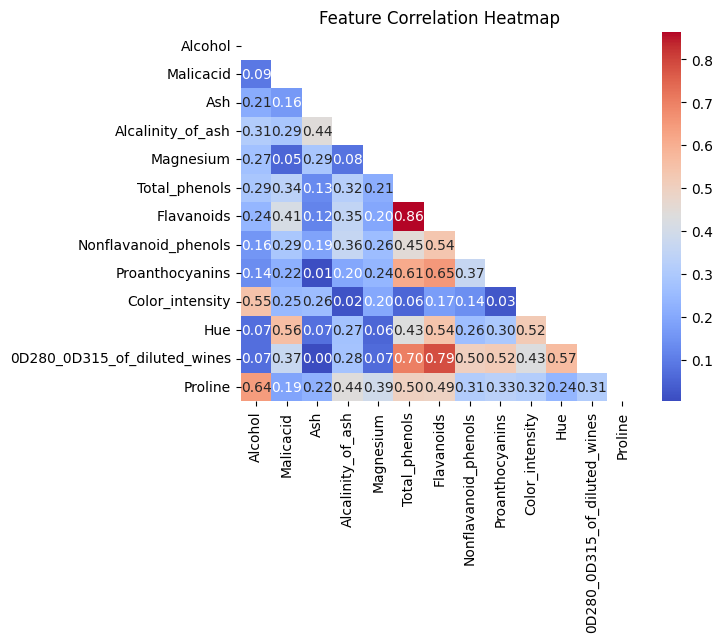

In [12]:
features_correlations(X, threshold=None, heatmap=True)

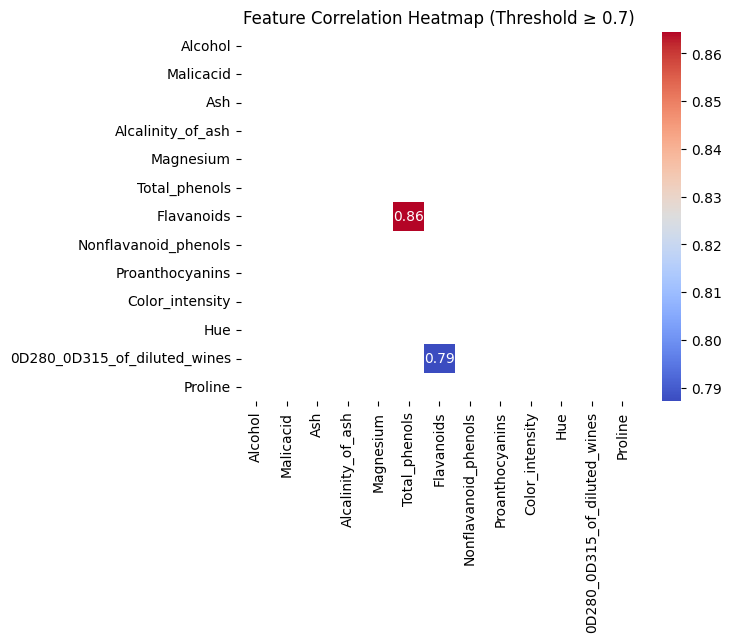

In [13]:
features_correlations(X, threshold=0.7, heatmap=True)

#### Hierarchical clustering

- A way to group data into a hierarchy based on how similar or different they are, using a distance measure like the Pearson Correlation Coefficient.

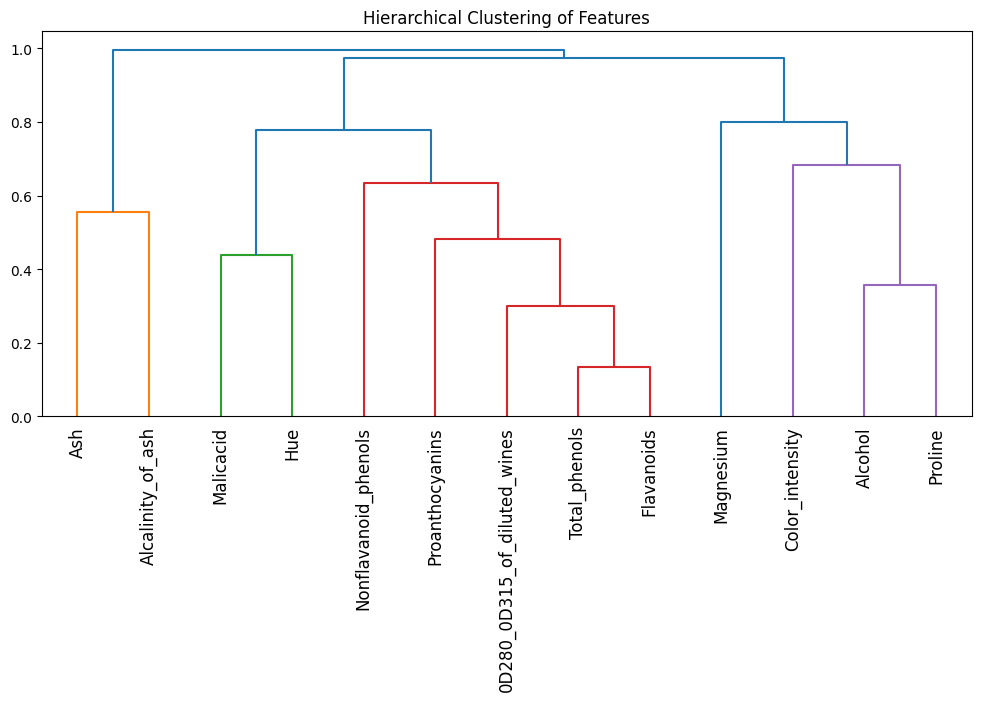

In [14]:
features_correlations(X, threshold=0.7, clustering=True)

#### Clustermap

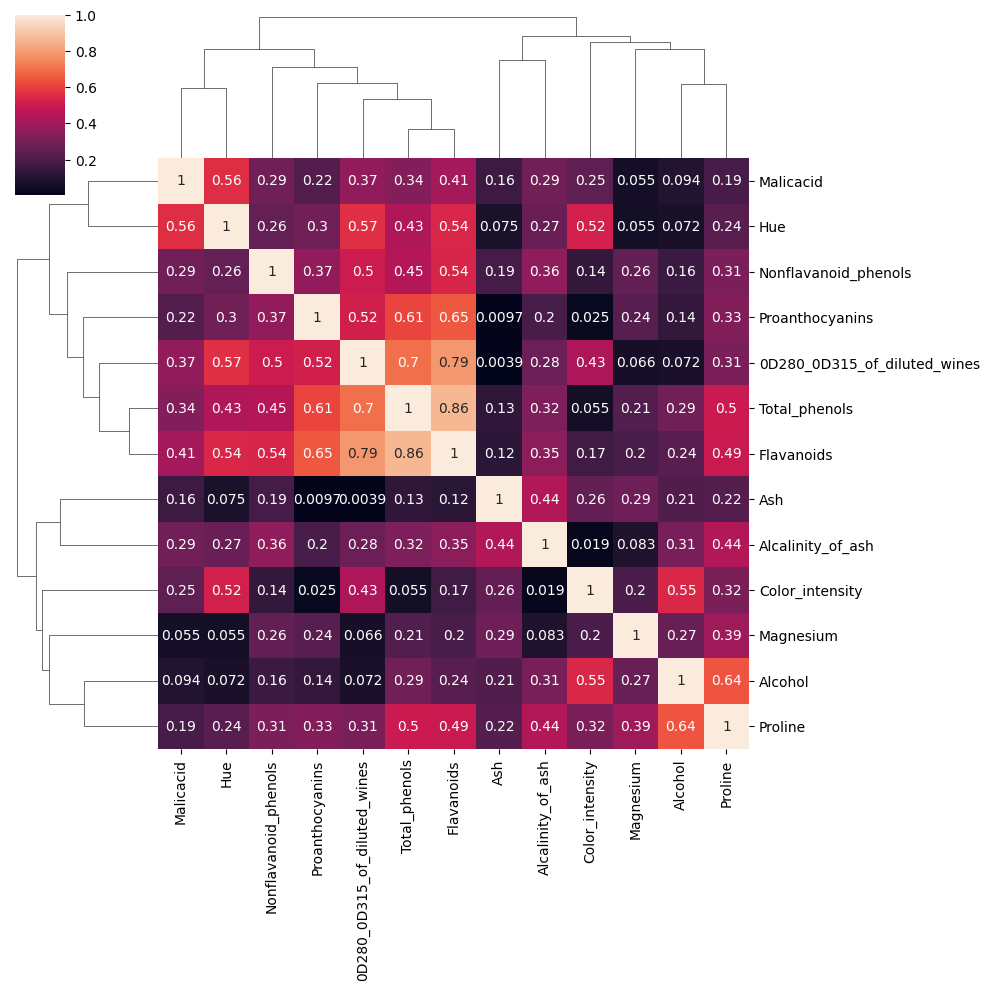

In [15]:
# features_correlations(X, threshold=0.7, heatmap_clustering=True)
sns.clustermap(X.corr().abs(), annot=True) # same result as above


In [16]:
corr_pairs_df, feat_drop = features_correlations(X, threshold=0.7, output=True)

In [17]:
df2 = df.copy().drop(feat_drop, axis=1)
X2 = X.copy().drop(feat_drop, axis=1)

X2

# Features

## Features importance

In [19]:
from sklearn.ensemble import RandomForestClassifier

def features_importance(df, target_col, plot=False):
    rf = RandomForestClassifier(random_state=42)
    rf.fit(df, target_col.values.ravel())  # Convert to 1D array
    importances = rf.feature_importances_

    # Rank features by importance
    feature_importance = pd.DataFrame({'Feature': df.columns,
                                      'Importance': importances}).sort_values(by='Importance', ascending=False)

    if plot:
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title('Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    return feature_importance


## Feature scaling

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def feature_scaling(df, method='standard'):
    """
    Apply feature scaling to a DataFrame using StandardScaler or MinMaxScaler.
    """
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'robust':
        scaler = RobustScaler()

    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    return df_scaled

In [21]:
x_sc_df = feature_scaling(X, method='standard')
x2_sc_df = feature_scaling(X2, method='standard')

x_mm_df = feature_scaling(X, method='minmax')
x2_mm_df = feature_scaling(X2, method='minmax')

x_rb_df = feature_scaling(X, method='robust')
x2_rb_df = feature_scaling(X2, method='robust')

# Clustering

## Clustering function library

In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, normalized_mutual_info_score, adjusted_rand_score, ConfusionMatrixDisplay, confusion_matrix
import scipy.cluster.hierarchy as sch
from scipy.stats import mode
from collections import Counter


def opti_dbscan(df, eps=None, min_samples=None):
    """
    Optimize DBSCAN parameters using Silhouette Score.
    """
    if eps is not None and min_samples is not None:
        # Directly apply DBSCAN
        model = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
        return model

    results = []
    for eps in np.linspace(0.001,10,100):
        for min_samples in range(2, 21):
            model = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
            labels = model.labels_

            # Compute number of clusters and noise points
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # Exclude noise cluster (-1)
            n_noise_ = np.sum(labels == -1)  # Count noise points

            # Compute cluster distribution
            cluster_distribution = Counter(labels[labels != -1])  # Count points per cluster
            cluster_dist_str = str(dict(cluster_distribution))  # Convert to string for storage

            # Exclude noise points
            mask = labels != -1
            valid_points = df.iloc[mask]
            valid_labels = labels[mask]

            # Compute silhouette score only if there are at least 2 clusters
            if len(set(valid_labels)) > 1:
                score = silhouette_score(valid_points, valid_labels)
                results.append((eps, min_samples, score, n_clusters_, n_noise_, cluster_dist_str))
    results = pd.DataFrame(results, columns=['EPS','Samples','Score','Cluster','Noise','Cluster Distribution'])
    return results, model


def compute_silhouette(df, model_name, max_k=30):
    """
    Compute Silhouette Score for KMeans and Agglomerative clustering.
    """
    s_score = []
    cluster_range = range(2, max_k + 1)

    model_map = {
        'kmeans': lambda k: KMeans(n_clusters=k, random_state=123),
        'hierarchical': lambda k: AgglomerativeClustering(n_clusters=k, linkage='ward')
    }

    if model_name not in model_map:
        raise ValueError("Invalid model type. Use 'kmeans' or 'hierarchical'.")

    for k in cluster_range:
        model = model_map[model_name](k).fit(df)
        labels = model.labels_
        s_score.append(silhouette_score(df, labels, metric='euclidean'))

    # Create DataFrame with percentage change
    s_score_df = pd.DataFrame({
        'Clusters': list(cluster_range),
        'Silhouette Score': s_score
    })
    s_score_df['PCT_Change'] = s_score_df['Silhouette Score'].pct_change().abs() * 100

    return s_score_df, model


def optimal_clusters(df, model_type, max_k=30, threshold=4.5, show_elbow=False, scoring='PCT_Change'):
    """
    Determine the optimal number of clusters (Means and Agglomerative clustering) using the Silhouette Score threshold.
    """
    if model_type in ['kmeans', 'hierarchical']:
        score_df, model = compute_silhouette(df, model_type, max_k)
        metric = 'Silhouette Score'
    else:
        raise ValueError("Invalid model_type. Choose 'kmeans' or 'hierarchical")

    # Identify first cluster below threshold
    optimal_clusters = score_df[score_df[scoring] < threshold]['Clusters'].min()

    if show_elbow:
        plot_elbow(score_df, 'Silhouette Score', threshold)

    return optimal_clusters, score_df


def plot_elbow(score_df, metric, threshold=4.5):
    """
    Plot metric (Silhouette Score) and percentage change.
    """
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Primary axis: Percentage Change
    ax1.plot(score_df['Clusters'], score_df['PCT_Change'], 'bo-', label="PCT Change")
    ax1.axhline(threshold, color='g', linestyle="--", label=f"Threshold = {threshold}%")
    ax1.set_xlabel("Number of Clusters")
    ax1.set_ylabel("Percentage Change (%)", color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")

    # Secondary axis: Metric (Silhouette Score)
    ax2 = ax1.twinx()
    ax2.plot(score_df['Clusters'], score_df[metric], 'ro-', label=metric)
    ax2.set_ylabel(metric, color="red")
    ax2.tick_params(axis='y', labelcolor="red")

    # Combine both legends
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    # ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper left", bbox_to_anchor=(1, 1))
    ax1.legend(handles1 + handles2, labels1 + labels2, loc="upper right", fontsize=10, frameon=True, title="Legend")

    # Title and layout
    plt.title(f"{metric} and Percentage Change vs Number of Clusters")
    plt.tight_layout()
    plt.show()


def plot_cluster_scatter(data, model, feat1, feat2, anomalies=None, num_anomalies=5, ):
    '''
        Scatter plot of clustered data with anomaly highlighting.
    '''
    # Check if feat1 and feat2 are column names (str) or indices (int)
    if isinstance(feat1, int):
        feat1_name = data.columns[feat1]  # Convert index to column name
    else:
        feat1_name = feat1  # Keep it as string

    if isinstance(feat2, int):
        feat2_name = data.columns[feat2]  # Convert index to column name
    else:
        feat2_name = feat2  # Keep it as string

    # Extract numerical data
    x_values = data[feat1_name]
    y_values = data[feat2_name]

    # Get cluster labels
    labels = model.labels_

    # Scatter plot of clusters
    plt.scatter(x_values, y_values, c=labels, s=50, cmap='viridis', alpha=0.6)

    # Plot cluster centers
    if hasattr(model, 'cluster_centers_'):
        centroids = model.cluster_centers_
        plt.scatter(centroids[:, data.columns.get_loc(feat1_name)],
                    centroids[:, data.columns.get_loc(feat2_name)],
                    c='red', s=200, alpha=0.7, label='Centroids')

    # Highlight anomalies
    if anomalies is not None:
        distances = np.min(model.transform(data), axis=1)
        sorted_idx = np.argsort(distances)[-num_anomalies:]  # Top n furthest points
        plt.scatter(
            x_values.iloc[sorted_idx],
            y_values.iloc[sorted_idx],
            s=100, linewidths=2, edgecolors='blue',
            facecolors='none', label='Anomalies'
        )

    # Labels and title
    plt.xlabel(feat1_name)
    plt.ylabel(feat2_name)
    plt.title('Cluster Visualization')
    plt.legend()
    plt.show()


def plot_dendrogram_func(df):
    """
    Plots a dendrogram for hierarchical clustering on features.
    """
    # Compute linkage matrix
    linkage_matrix = sch.linkage(df.T, method='ward')

    # Plot dendrogram
    plt.figure(figsize=(10, 5))
    dend = sch.dendrogram(linkage_matrix, labels=df.columns, leaf_rotation=90)
    plt.title("Hierarchical Clustering Dendrogram (Features)")
    plt.xlabel("Features")
    plt.ylabel("Distance")
    plt.show()


def find_anomalies(data, num_cluster, num_anomalies=5):
    # Fit K-means with
    model = KMeans(n_clusters=num_cluster, random_state=123).fit(data)

    # Calculate distances from the cluster center
    distances = np.min(model.transform(data), axis=1)
    sorted_idx = np.argsort(distances)[-num_anomalies:]  # Top n furthest points

    # Identify anomalies
    anomalies = data.iloc[sorted_idx]

    return anomalies, model


def clustering_performance(df, model, target_column, plot_confusion=None):
    '''
        Evaluate clustering performance using Adjusted Rand Index and Normalized Mutual Information.
        If Target label available.
    '''
    df = df.copy()  # Avoid modifying the original DataFrame

    # Assign cluster labels from K-Means model
    df['Cluster'] = model.labels_

    # Create a temporary DataFrame with true labels and assigned clusters
    temp_df = pd.DataFrame({
        'True_Label': df[target_column].values.ravel(),
        'Cluster': df['Cluster']
    })

    # Create mapping: Assign the most common true label to each cluster
    mapping = temp_df.groupby('Cluster')['True_Label'].agg(lambda x: mode(x)[0]).to_dict()

    # Map clusters to most likely true labels
    df['Mapped_Cluster'] = df['Cluster'].map(mapping)

    # Compute clustering performance
    nmi = normalized_mutual_info_score(df[target_column], df['Mapped_Cluster'])
    ari = adjusted_rand_score(df[target_column], df['Mapped_Cluster'])

    # Print performance scores
    print(f'Adjusted Rand Index (ARI): {ari:.2f}')
    print(f'Normalized Mutual Info (NMI): {nmi:.2f}')

    # Confusion Matrix (if requested)
    if plot_confusion:
        cm = confusion_matrix(df[target_column], df['Mapped_Cluster'])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(df[target_column].unique()))
        disp.plot(cmap='Blues', values_format='g')

    return df  # Return the modified DataFrame


def run_optimized_model(features_df, model_type, max_k, plot_scatter=False, feat1=None, feat2=None, plot_dendrogram=False, df=None, confuse_mat=False, target_name=None):
    """
    Runs an optimized clustering model (KMeans or Hierarchical) and optionally plots results.
    """
    score_df, testing_model = compute_silhouette(features_df, model_type, max_k=max_k)

    if plot_scatter:
        plot_cluster_scatter(data=features_df, model=testing_model, feat1=feat1, feat2=feat2)
    if df is not None and confuse_mat:
        clustering_performance(df, testing_model, target_name, plot_confusion=True)
    if plot_dendrogram:
        plot_dendrogram_func(features_df)

    return testing_model, score_df


## KMeans

In [23]:
# Run Kmeans cluster across different data sets to find optimal cluster based on silhouette score
datasets = {
    "X": X,
    "x_mm_df": x_mm_df,
    "x_sc_df": x_sc_df,
    "x_rb_df": x_rb_df,
    "X2": X2,
    "x2_mm_df": x2_mm_df,
    "x2_sc_df": x2_sc_df,
    "x2_rb_df": x2_rb_df
}

for dataset_name, dataset in datasets.items():
    clusters, score_df = optimal_clusters(dataset, model_type='kmeans', show_elbow=False)
    print(f'Optimal number of clusters for dataset {dataset_name} : {clusters}\n')


Optimal number of clusters for dataset X : 6

Optimal number of clusters for dataset x_mm_df : 3

Optimal number of clusters for dataset x_sc_df : 11

Optimal number of clusters for dataset x_rb_df : 11

Optimal number of clusters for dataset X2 : 6

Optimal number of clusters for dataset x2_mm_df : 9

Optimal number of clusters for dataset x2_sc_df : 9

Optimal number of clusters for dataset x2_rb_df : 7



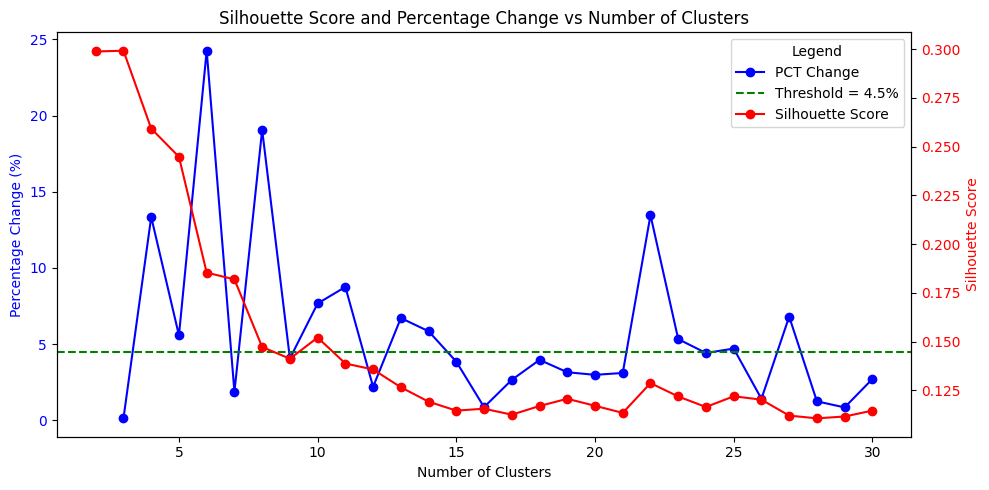

In [24]:
score_df, testing_model = compute_silhouette(x_mm_df, 'kmeans', max_k=30)
plot_elbow(score_df, 'Silhouette Score', threshold=4.5)

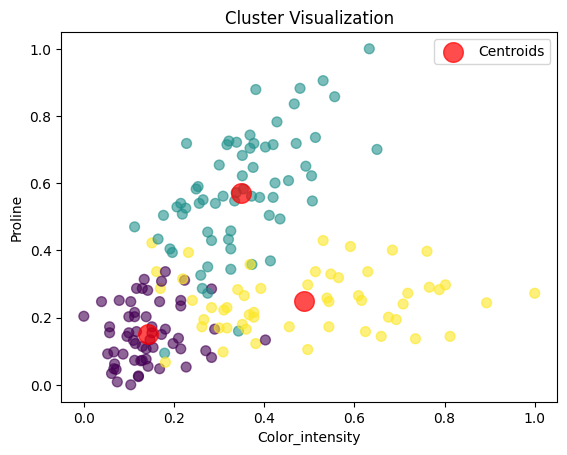

In [25]:
kmeans_model, score_df = run_optimized_model(x_mm_df, model_type='kmeans', max_k=3,
                    plot_scatter=True, feat1='Color_intensity', feat2='Proline',
                    plot_dendrogram=False,
                    df=None, confuse_mat=None, target_name='class')

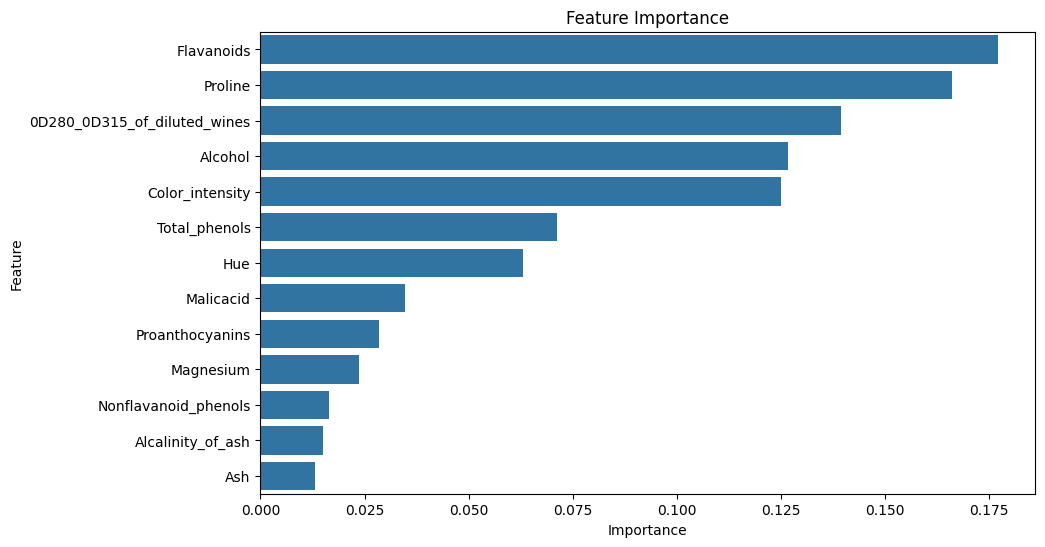

,Feature,Importance
6,Flavanoids,0.177231
12,Proline,0.166033
11,0D280_0D315_of_diluted_wines,0.139322
0,Alcohol,0.126732
9,Color_intensity,0.124924
5,Total_phenols,0.071190
10,Hue,0.063078
1,Malicacid,0.034728
8,Proanthocyanins,0.028447
4,Magnesium,0.023775


In [26]:
features_importance(X, pd.DataFrame(kmeans_model.labels_), plot=True)

In [27]:
# run_optimized_model(x_mm_df, model_type='kmeans', max_k=3,
#                     plot_scatter=False, feat1=None, feat2=None,
#                     plot_dendrogram=False,
#                     df=df, confuse_mat=True, target_name='class')

## Agglomerative Clustering

In [28]:
# Run agglomerative clustering across different data sets to find optimal cluster based on silhouette score
datasets = {
    "X": X,
    "x_mm_df": x_mm_df,
    "x_sc_df": x_sc_df,
    "x_rb_df": x_rb_df,
    "X2": X2,
    "x2_mm_df": x2_mm_df,
    "x2_sc_df": x2_sc_df,
    "x2_rb_df": x2_rb_df
}

for dataset_name, dataset in datasets.items():
    clusters, score_df = optimal_clusters(dataset, model_type='hierarchical', show_elbow=False)
    print(f'Optimal number of clusters for dataset {dataset_name} : {clusters}\n')


Optimal number of clusters for dataset X : 4

Optimal number of clusters for dataset x_mm_df : 3

Optimal number of clusters for dataset x_sc_df : 3

Optimal number of clusters for dataset x_rb_df : 3

Optimal number of clusters for dataset X2 : 4

Optimal number of clusters for dataset x2_mm_df : 6

Optimal number of clusters for dataset x2_sc_df : 5

Optimal number of clusters for dataset x2_rb_df : 7



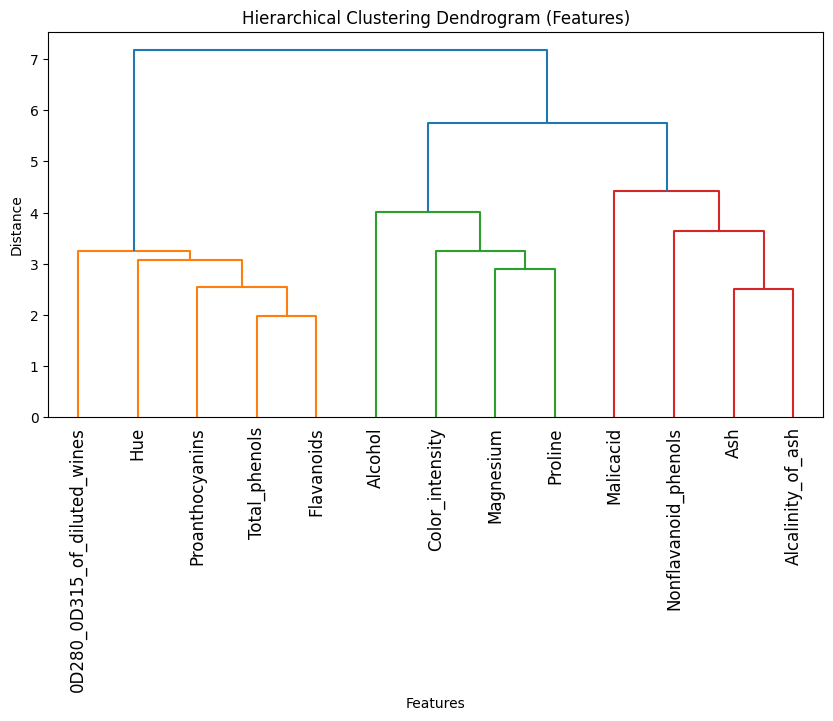

In [29]:
agg_cluster_model, results_df = run_optimized_model(x_mm_df, model_type='hierarchical', max_k=3,
                    plot_scatter=False, feat1='Color_intensity', feat2='Proline',
                    plot_dendrogram=True,
                    df=None, confuse_mat=None, target_name='class')

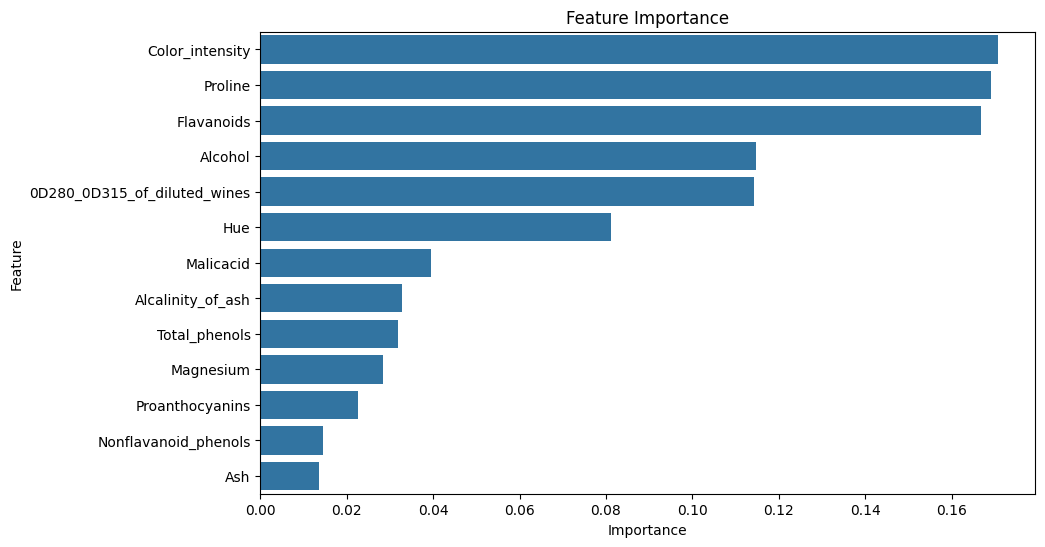

,Feature,Importance
9,Color_intensity,0.170872
12,Proline,0.169109
6,Flavanoids,0.166854
0,Alcohol,0.114618
11,0D280_0D315_of_diluted_wines,0.114227
10,Hue,0.081263
1,Malicacid,0.039516
3,Alcalinity_of_ash,0.032831
5,Total_phenols,0.031773
4,Magnesium,0.028396


In [30]:
features_importance(X, pd.DataFrame(agg_cluster_model.labels_), plot=True)

In [31]:
# run_optimized_model(x_mm_df, model_type='hierarchical', max_k=3,
#                     plot_scatter=False, feat1=None, feat2=None,
#                     plot_dendrogram=False,
#                     df=df, confuse_mat=True, target_name='class')

## DBSCAN

In [32]:
dbscan_results, dbscan_model = opti_dbscan(x_mm_df)
dbscan_results.sort_values(by='Score', ascending=False)

,EPS,Samples,Score,Cluster,Noise,Cluster Distribution
8,0.405,7,0.448066,2,99,"{0: 66, 1: 13}"
10,0.405,9,0.447292,3,113,"{0: 47, 1: 9, 2: 9}"
27,0.506,20,0.421288,2,73,"{0: 80, 1: 25}"
26,0.506,19,0.405170,2,64,"{0: 80, 1: 34}"
25,0.506,18,0.399275,2,60,"{0: 82, 1: 36}"
6,0.405,5,0.391481,2,75,"{0: 78, 1: 25}"
24,0.506,17,0.387286,2,51,"{0: 91, 1: 36}"
23,0.506,16,0.387286,2,51,"{0: 91, 1: 36}"
22,0.506,15,0.373052,2,46,"{0: 95, 1: 37}"
2,0.304,4,0.370679,3,165,"{1: 5, 2: 4, 0: 4}"


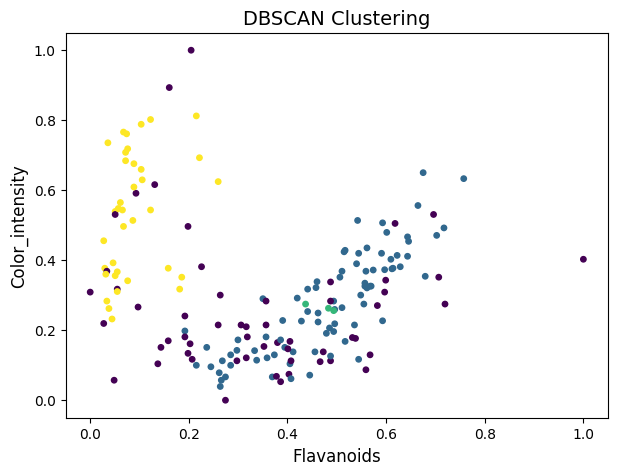

In [33]:
dbscan_model = opti_dbscan(x_mm_df, eps=0.405, min_samples=3)

# Plotting the resulting clusters
plt.figure(figsize=(7,5))
plt.scatter(x_mm_df['Flavanoids'], x_mm_df['Color_intensity'], c=dbscan_model.labels_, s=15)

# Set the plot title and axis label
plt.title('DBSCAN Clustering', fontsize=14)
plt.xlabel('Flavanoids', fontsize=12)
plt.ylabel('Color_intensity', fontsize=12)
plt.show()

# PCA + Clustering

## PCA function library

In [34]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np

def pca_magic(data, components=0.9, plot_variance=False, show_loading=False):
    '''
        Apply PCA to a dataset and optionally return PCA component loadings.
    '''
    pca = PCA(n_components=components)
    pca.fit(data)

    # PCA-transformed dataset
    transformed_data = pca.transform(data)

    # Convert to DataFrame
    transformed_df = pd.DataFrame(transformed_data,
                                  columns=[f'PC_{i}' for i in range(1, pca.n_components_ + 1)])

    # # Bar plot of explained_variance ratio
    if plot_variance:
        plt.figure(figsize=(8, 5))
        plt.bar(
            range(1, len(pca.explained_variance_ratio_) + 1),
            pca.explained_variance_ratio_,
            alpha=0.7, align='center', color='royalblue'
        )
        plt.xlabel('Principal Components', fontsize=12)
        plt.ylabel('Explained Variance Ratio', fontsize=12)
        plt.title('Explained Variance of PCA Components', fontsize=14, fontweight='bold')
        plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.show()

    # PCA loading (how original features contribut to PCA)
    if show_loading:
        loading_df = pd.DataFrame(
            pca.components_.T,
            index = data.columns,
            columns = [f'feature_{i}' for i in range(1, pca.n_components_ +1)]
        )
        return transformed_df, loading_df
    else:
        return transformed_df


def plot_pca(pca_df, labels):
    """
    Plots a 2D t-SNE visualization of PCA-transformed data.
    """
    # Ensure input is an array (TSNE requires NumPy arrays)
    X_tsne = TSNE(n_components=2,
                  learning_rate=100,
                  perplexity=min(25, len(pca_df) - 1),  # Adjusting perplexity to dataset size
                  random_state=42
                  ).fit_transform(pca_df.values)

    # Ensure labels are NumPy array
    labels = np.array(labels)

    # Create the figure
    plt.figure(figsize=(12, 6), facecolor='white')

    # Plot the clusters
    clustered_mask = labels != -1
    scatter = plt.scatter(
        X_tsne[clustered_mask, 0],
        X_tsne[clustered_mask, 1],
        s=100,
        alpha=0.8,
        c=labels[clustered_mask],
        cmap='viridis',
        label="Clusters"
    )

    # Plot noise points (outliers)
    noise_mask = labels == -1
    if np.any(noise_mask):  # Only plot if there are noise points
        plt.scatter(
            X_tsne[noise_mask, 0],
            X_tsne[noise_mask, 1],
            s=100,
            alpha=0.3,
            color='gray',
            label="Noise"
        )

    # Labels and title
    plt.xlabel("t-SNE Component 1", fontsize=12)
    plt.ylabel("t-SNE Component 2", fontsize=12)
    plt.title("t-SNE Visualization of PCA-Transformed Data", fontsize=14, fontweight='bold')

    # Add legend
    plt.legend(loc="best", fontsize=10)

    # Show plot
    plt.show()


## Dimension reduction

In [35]:
datasets = {
    "X": X,
    "x_mm_df": x_mm_df,
    "x_sc_df": x_sc_df,
    "x_rb_df": x_rb_df,
    "X2": X2,
    "x2_mm_df": x2_mm_df,
    "x2_sc_df": x2_sc_df,
    "x2_rb_df": x2_rb_df
}

# Apply PCA to each dataset and print results
for dataset_name, dataset in datasets.items():
    pca_data = pca_magic(dataset, plot_variance=False, show_loading=False)

    print(f"Reduced dimensions for dataset: {dataset_name}: "
          f"Original Features: {dataset.shape[1]}, "
          f"Reduced Dimensions: {pca_data.shape[1]}\n")

Reduced dimensions for dataset: X: Original Features: 13, Reduced Dimensions: 1

Reduced dimensions for dataset: x_mm_df: Original Features: 13, Reduced Dimensions: 8

Reduced dimensions for dataset: x_sc_df: Original Features: 13, Reduced Dimensions: 8

Reduced dimensions for dataset: x_rb_df: Original Features: 13, Reduced Dimensions: 7

Reduced dimensions for dataset: X2: Original Features: 12, Reduced Dimensions: 1

Reduced dimensions for dataset: x2_mm_df: Original Features: 12, Reduced Dimensions: 8

Reduced dimensions for dataset: x2_sc_df: Original Features: 12, Reduced Dimensions: 8

Reduced dimensions for dataset: x2_rb_df: Original Features: 12, Reduced Dimensions: 7



In [36]:
x_mm_pca_df, x_mm_loading_df = pca_magic(x_mm_df, plot_variance=False, show_loading=True)
x_sc_pca_df, x_sc_loading_df = pca_magic(x_sc_df, plot_variance=False, show_loading=True)
x_rb_pca_df, x_rb_loading_df = pca_magic(x_rb_df, plot_variance=False, show_loading=True)

## Kmeans

In [37]:
# Run Kmeans cluster across different data sets to find optimal cluster based on silhouette score
datasets = {
    "X": X,
    "x_mm_df": x_mm_df,
    "x_sc_df": x_sc_df,
    "x_rb_df": x_rb_df,
    "x_mm_pca_df": x_mm_pca_df,
    "x_sc_pca_df": x_sc_pca_df,
    "x_rb_pca_df": x_rb_pca_df,
    "X2": X2,
    "x2_mm_df": x2_mm_df,
    "x2_sc_df": x2_sc_df,
    "x2_rb_df": x2_rb_df
}

for dataset_name, dataset in datasets.items():
    clusters, score_df = optimal_clusters(dataset, model_type='kmeans', show_elbow=False)
    print(f'Optimal number of clusters for dataset {dataset_name} : {clusters}\n')


Optimal number of clusters for dataset X : 6

Optimal number of clusters for dataset x_mm_df : 3

Optimal number of clusters for dataset x_sc_df : 11

Optimal number of clusters for dataset x_rb_df : 11

Optimal number of clusters for dataset x_mm_pca_df : 3

Optimal number of clusters for dataset x_sc_pca_df : 12

Optimal number of clusters for dataset x_rb_pca_df : 8

Optimal number of clusters for dataset X2 : 6

Optimal number of clusters for dataset x2_mm_df : 9

Optimal number of clusters for dataset x2_sc_df : 9

Optimal number of clusters for dataset x2_rb_df : 7



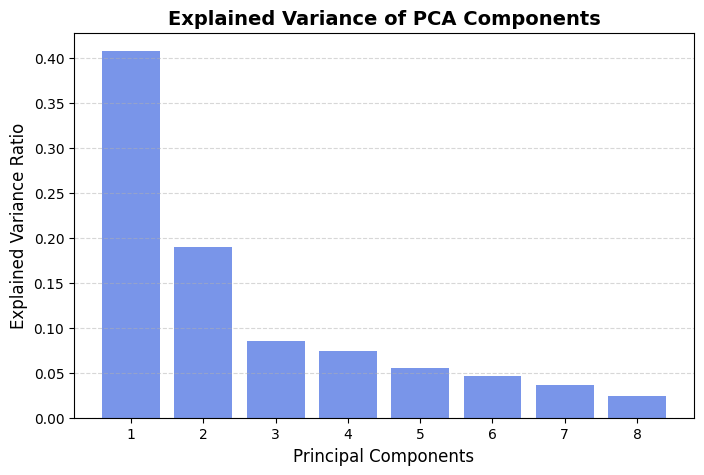

In [38]:
X_scaled_pca, pca_loading = pca_magic(x_mm_df, plot_variance=True, show_loading=True)

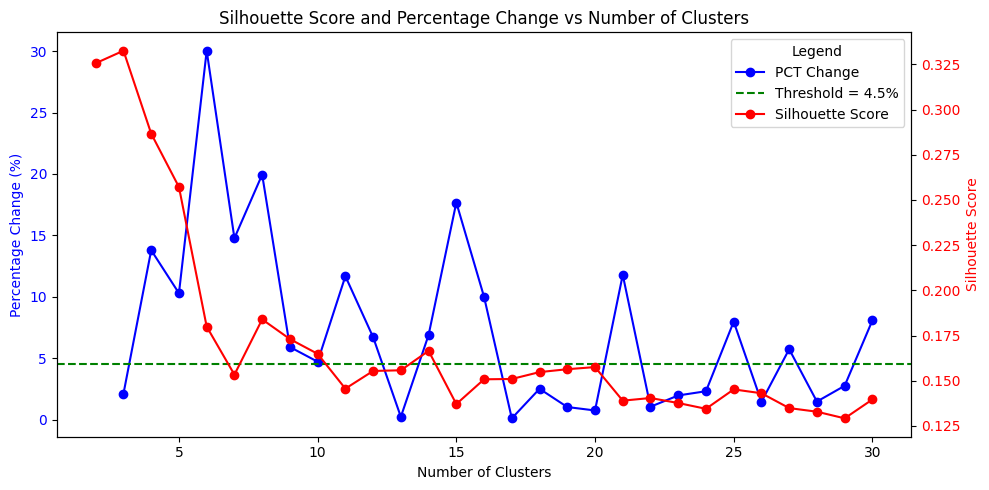

In [39]:
score_df, testing_model = compute_silhouette(x_mm_pca_df, 'kmeans')
plot_elbow(score_df, 'Silhouette Score', threshold=4.5)

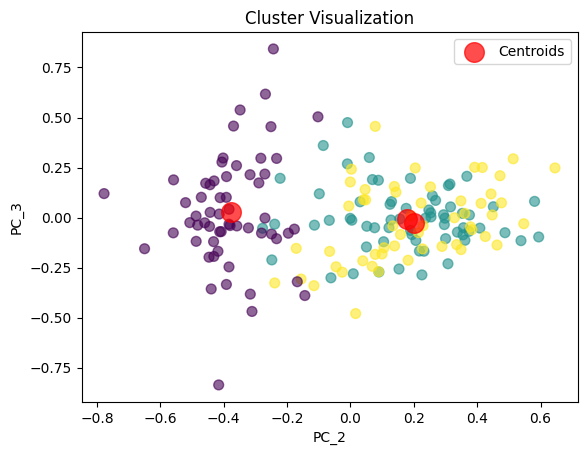

In [40]:
test_model, results = run_optimized_model(x_mm_pca_df, model_type='kmeans', max_k=3,
                    plot_scatter=True, feat1=1, feat2=2,
                    plot_dendrogram=False,
                    df=None, confuse_mat=None, target_name='class')

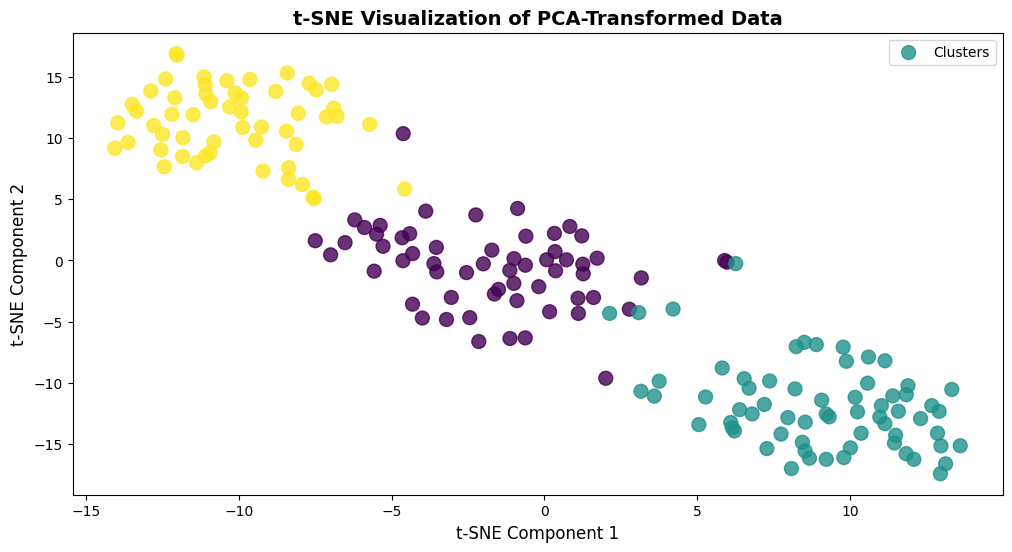

In [41]:
plot_pca(x_mm_pca_df, test_model.labels_)

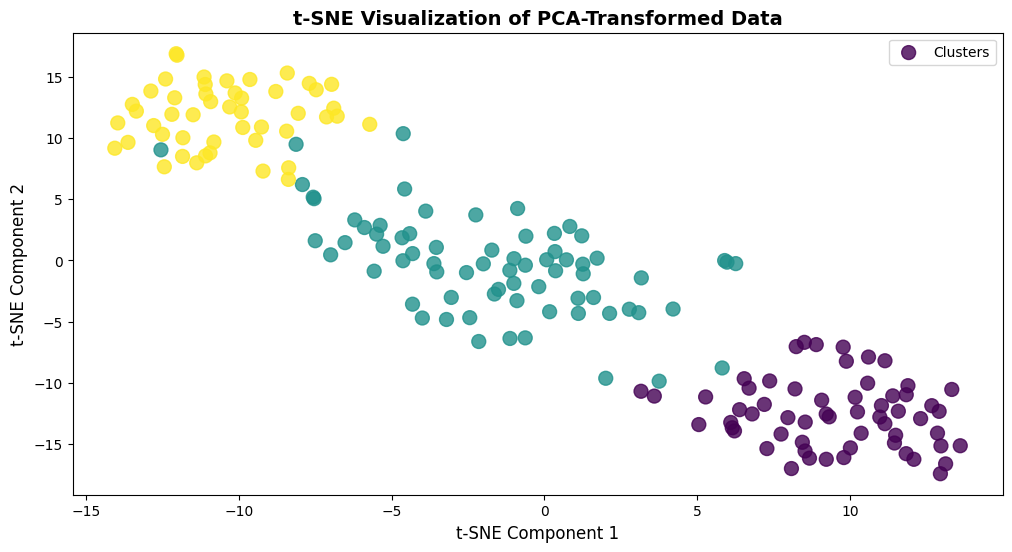

In [42]:
plot_pca(x_mm_pca_df, df['class'])

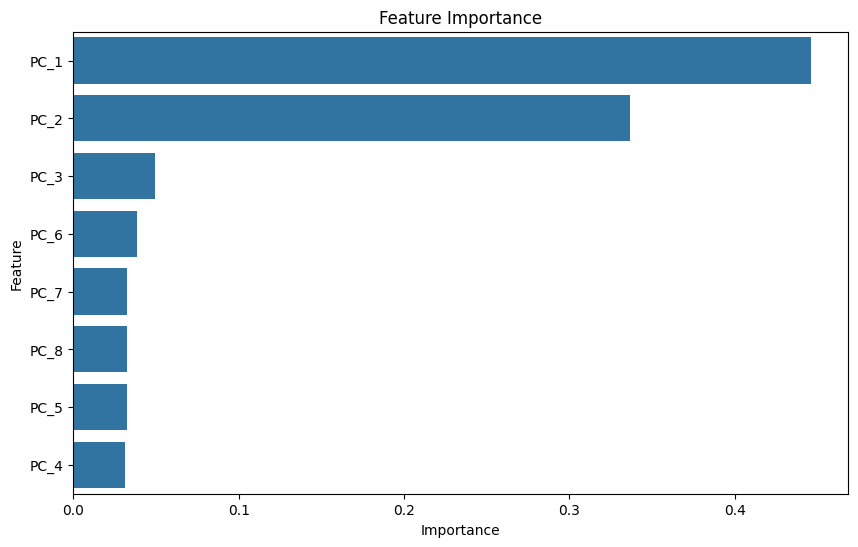

,Feature,Importance
0,PC_1,0.446252
1,PC_2,0.336794
2,PC_3,0.049490
5,PC_6,0.038827
6,PC_7,0.032581
7,PC_8,0.032313
4,PC_5,0.032271
3,PC_4,0.031471


In [43]:
features_importance(x_mm_pca_df, pd.DataFrame(test_model.labels_), plot=True)

In [44]:
# run_optimized_model(x_mm_pca_df, model_type='kmeans', max_k=3,
#                     plot_scatter=False, feat1=1, feat2=2,
#                     plot_dendrogram=False,
#                     df=df, confuse_mat=True, target_name='class')

## Agglomerative clustering

In [45]:
# Run Kmeans cluster across different data sets to find optimal cluster based on silhouette score
datasets = {
    "X": X,
    "x_mm_df": x_mm_df,
    "x_sc_df": x_sc_df,
    "x_rb_df": x_rb_df,
    "x_mm_pca_df": x_mm_pca_df,
    "x_sc_pca_df": x_sc_pca_df,
    "x_rb_pca_df": x_rb_pca_df,
    "X2": X2,
    "x2_mm_df": x2_mm_df,
    "x2_sc_df": x2_sc_df,
    "x2_rb_df": x2_rb_df
}

for dataset_name, dataset in datasets.items():
    clusters, score_df = optimal_clusters(dataset, model_type='hierarchical', show_elbow=False)
    print(f'Optimal number of clusters for dataset {dataset_name} : {clusters}\n')


Optimal number of clusters for dataset X : 4

Optimal number of clusters for dataset x_mm_df : 3

Optimal number of clusters for dataset x_sc_df : 3

Optimal number of clusters for dataset x_rb_df : 3

Optimal number of clusters for dataset x_mm_pca_df : 3

Optimal number of clusters for dataset x_sc_pca_df : 3

Optimal number of clusters for dataset x_rb_pca_df : 8

Optimal number of clusters for dataset X2 : 4

Optimal number of clusters for dataset x2_mm_df : 6

Optimal number of clusters for dataset x2_sc_df : 5

Optimal number of clusters for dataset x2_rb_df : 7



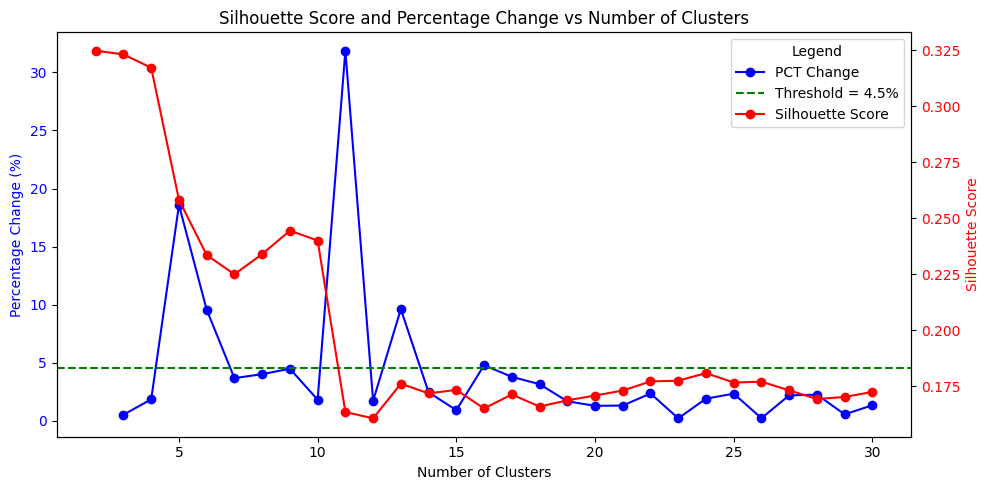

In [46]:
score_df, testing_model = compute_silhouette(x_mm_pca_df, 'hierarchical')
plot_elbow(score_df, 'Silhouette Score', threshold=4.5)

<ipython-input-22-754a7a0e5282>:173: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


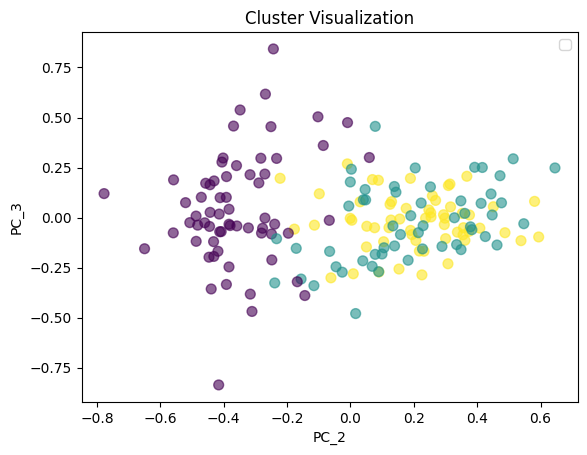

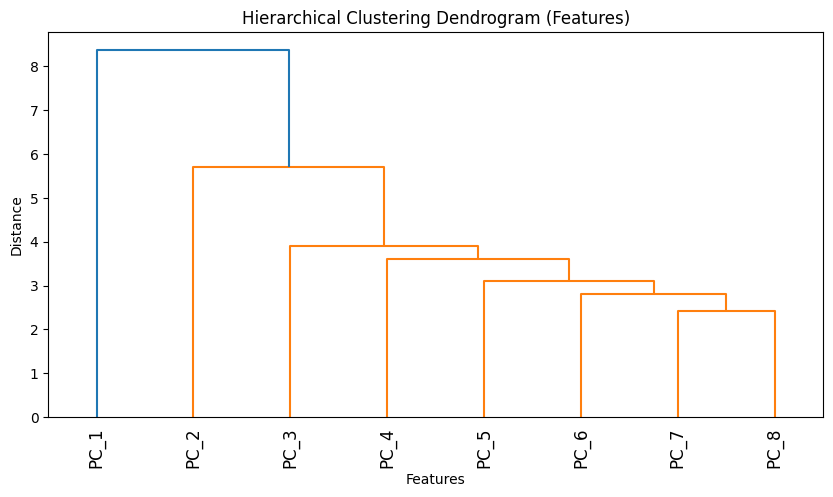

In [47]:
test_model, results = run_optimized_model(x_mm_pca_df, model_type='hierarchical', max_k=3,
                    plot_scatter=True, feat1=1, feat2=2,
                    plot_dendrogram=True,
                    df=None, confuse_mat=None, target_name='class')

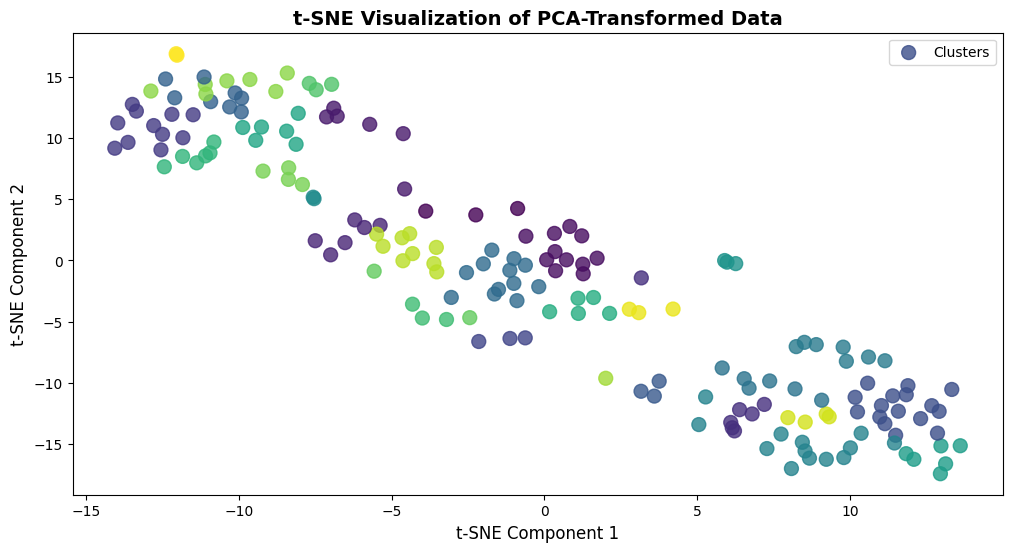

In [48]:
plot_pca(x_mm_pca_df, testing_model.labels_)

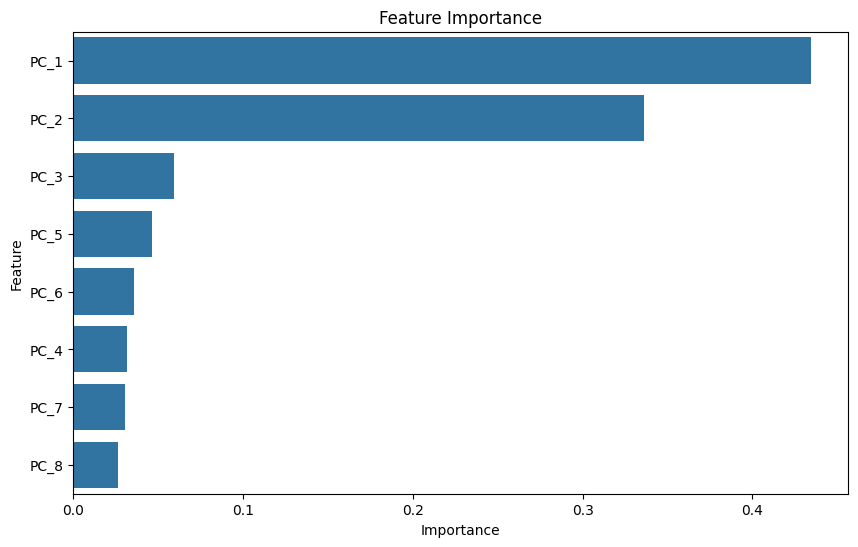

,Feature,Importance
0,PC_1,0.434694
1,PC_2,0.336093
2,PC_3,0.059066
4,PC_5,0.046613
5,PC_6,0.035474
3,PC_4,0.031431
6,PC_7,0.030499
7,PC_8,0.026129


In [49]:
features_importance(x_mm_pca_df, pd.DataFrame(test_model.labels_), plot=True)

In [50]:
# run_optimized_model(x_mm_pca_df, model_type='hierarchical', max_k=3,
#                     plot_scatter=False, feat1=1, feat2=2,
#                     plot_dendrogram=False,
#                     df=df, confuse_mat=True, target_name='class')

## DBSCAN

In [51]:
dbscan_results, dbscan_model = opti_dbscan(x_mm_pca_df)
dbscan_results.sort_values(by='Score', ascending=False)

,EPS,Samples,Score,Cluster,Noise,Cluster Distribution
1,0.203,3,0.609087,4,164,"{0: 4, 1: 3, 2: 4, 3: 3}"
7,0.304,7,0.532799,2,135,"{0: 36, 1: 7}"
0,0.203,2,0.491294,15,142,"{0: 4, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 3, 7: ..."
26,0.405,20,0.471685,2,108,"{0: 48, 1: 22}"
6,0.304,6,0.464863,4,112,"{0: 44, 2: 10, 1: 6, 3: 6}"
25,0.405,19,0.464650,2,105,"{0: 51, 1: 22}"
24,0.405,18,0.464650,2,105,"{0: 51, 1: 22}"
23,0.405,17,0.464650,2,105,"{0: 51, 1: 22}"
22,0.405,16,0.458856,2,86,"{0: 76, 1: 16}"
20,0.405,14,0.408081,2,69,"{0: 90, 1: 19}"


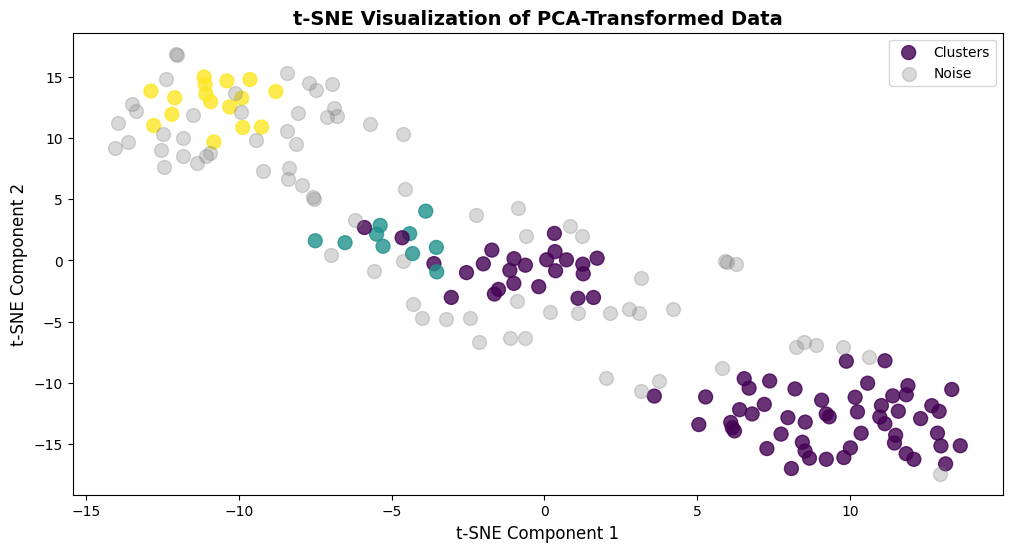

In [52]:
dbscan_model = opti_dbscan(x_mm_pca_df, eps=0.405, min_samples=15)

plot_pca(x_mm_pca_df, dbscan_model.labels_)